In [88]:
#######################
# standard code block #
#######################
# Necessary imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline
# see https://ipython.readthedocs.io/en/stable/interactive/magics.html
import pickle
import patsy

In [75]:
with open('book_movie_data.pkl', 'rb') as f:
    book_movie_data = pickle.load(f)

In [76]:
book_movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 705 entries, 0 to 704
Data columns (total 28 columns):
book_title               705 non-null object
book_rating              705 non-null float64
book_number_rating       705 non-null object
book_year_published      704 non-null object
adult                    705 non-null object
belongs_to_collection    76 non-null object
budget                   705 non-null int64
genres                   705 non-null object
homepage                 180 non-null object
id                       705 non-null object
imdb_id                  705 non-null object
original_language        705 non-null object
original_title           705 non-null object
overview                 705 non-null object
popularity               705 non-null object
poster_path              705 non-null object
production_companies     705 non-null object
production_countries     705 non-null object
release_date             705 non-null object
revenue                  705 non-null flo

In [77]:
book_movie_data['popularity']=pd.to_numeric(book_movie_data['popularity'])

In [78]:
#pairing down the features to those of most interest, numerical.


bk_mv = book_movie_data.loc[:,['book_title', 'book_rating', 'book_number_rating', 
                      'book_year_published', 'title', 'vote_average', 
                      'vote_count', 'budget', 'runtime', 
                      'release_date','revenue', 'popularity']]

In [79]:
bk_mv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 705 entries, 0 to 704
Data columns (total 12 columns):
book_title             705 non-null object
book_rating            705 non-null float64
book_number_rating     705 non-null object
book_year_published    704 non-null object
title                  705 non-null object
vote_average           705 non-null float64
vote_count             705 non-null float64
budget                 705 non-null int64
runtime                705 non-null float64
release_date           705 non-null object
revenue                705 non-null float64
popularity             705 non-null float64
dtypes: float64(6), int64(1), object(5)
memory usage: 71.6+ KB


In [80]:
with open('bk_mv.pkl', 'wb') as f:
    pickle.dump(bk_mv, f)

In [81]:
bk_mv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 705 entries, 0 to 704
Data columns (total 12 columns):
book_title             705 non-null object
book_rating            705 non-null float64
book_number_rating     705 non-null object
book_year_published    704 non-null object
title                  705 non-null object
vote_average           705 non-null float64
vote_count             705 non-null float64
budget                 705 non-null int64
runtime                705 non-null float64
release_date           705 non-null object
revenue                705 non-null float64
popularity             705 non-null float64
dtypes: float64(6), int64(1), object(5)
memory usage: 71.6+ KB


In [82]:
bk_mv.describe()

,book_rating,vote_average,vote_count,budget,runtime,revenue,popularity
count,705.000000,705.000000,705.000000,7.050000e+02,705.000000,7.050000e+02,705.000000
mean,3.922128,6.326383,584.551773,1.840347e+07,113.280851,5.917364e+07,7.955678
std,0.222584,1.222417,1154.862931,3.419483e+07,33.718091,1.370832e+08,9.574959
min,3.080000,0.000000,0.000000,0.000000e+00,25.000000,0.000000e+00,0.001459
25%,3.800000,5.900000,19.000000,0.000000e+00,95.000000,0.000000e+00,2.290681
50%,3.940000,6.500000,121.000000,2.264080e+05,108.000000,0.000000e+00,6.764056
75%,4.060000,7.000000,610.000000,2.500000e+07,125.000000,5.087714e+07,10.673296
max,4.560000,10.000000,9678.000000,2.500000e+08,386.000000,1.025491e+09,154.801009


In [83]:
bk_mv.corr()

,book_rating,vote_average,vote_count,budget,runtime,revenue,popularity
book_rating,1.000000,0.206703,0.202751,0.119831,-0.005385,0.171653,0.080529
vote_average,0.206703,1.000000,0.272046,0.099657,0.001977,0.158091,0.247619
vote_count,0.202751,0.272046,1.000000,0.603412,0.109464,0.747391,0.645435
budget,0.119831,0.099657,0.603412,1.000000,0.121404,0.753144,0.375680
runtime,-0.005385,0.001977,0.109464,0.121404,1.000000,0.113938,0.069944
revenue,0.171653,0.158091,0.747391,0.753144,0.113938,1.000000,0.447011
popularity,0.080529,0.247619,0.645435,0.375680,0.069944,0.447011,1.000000


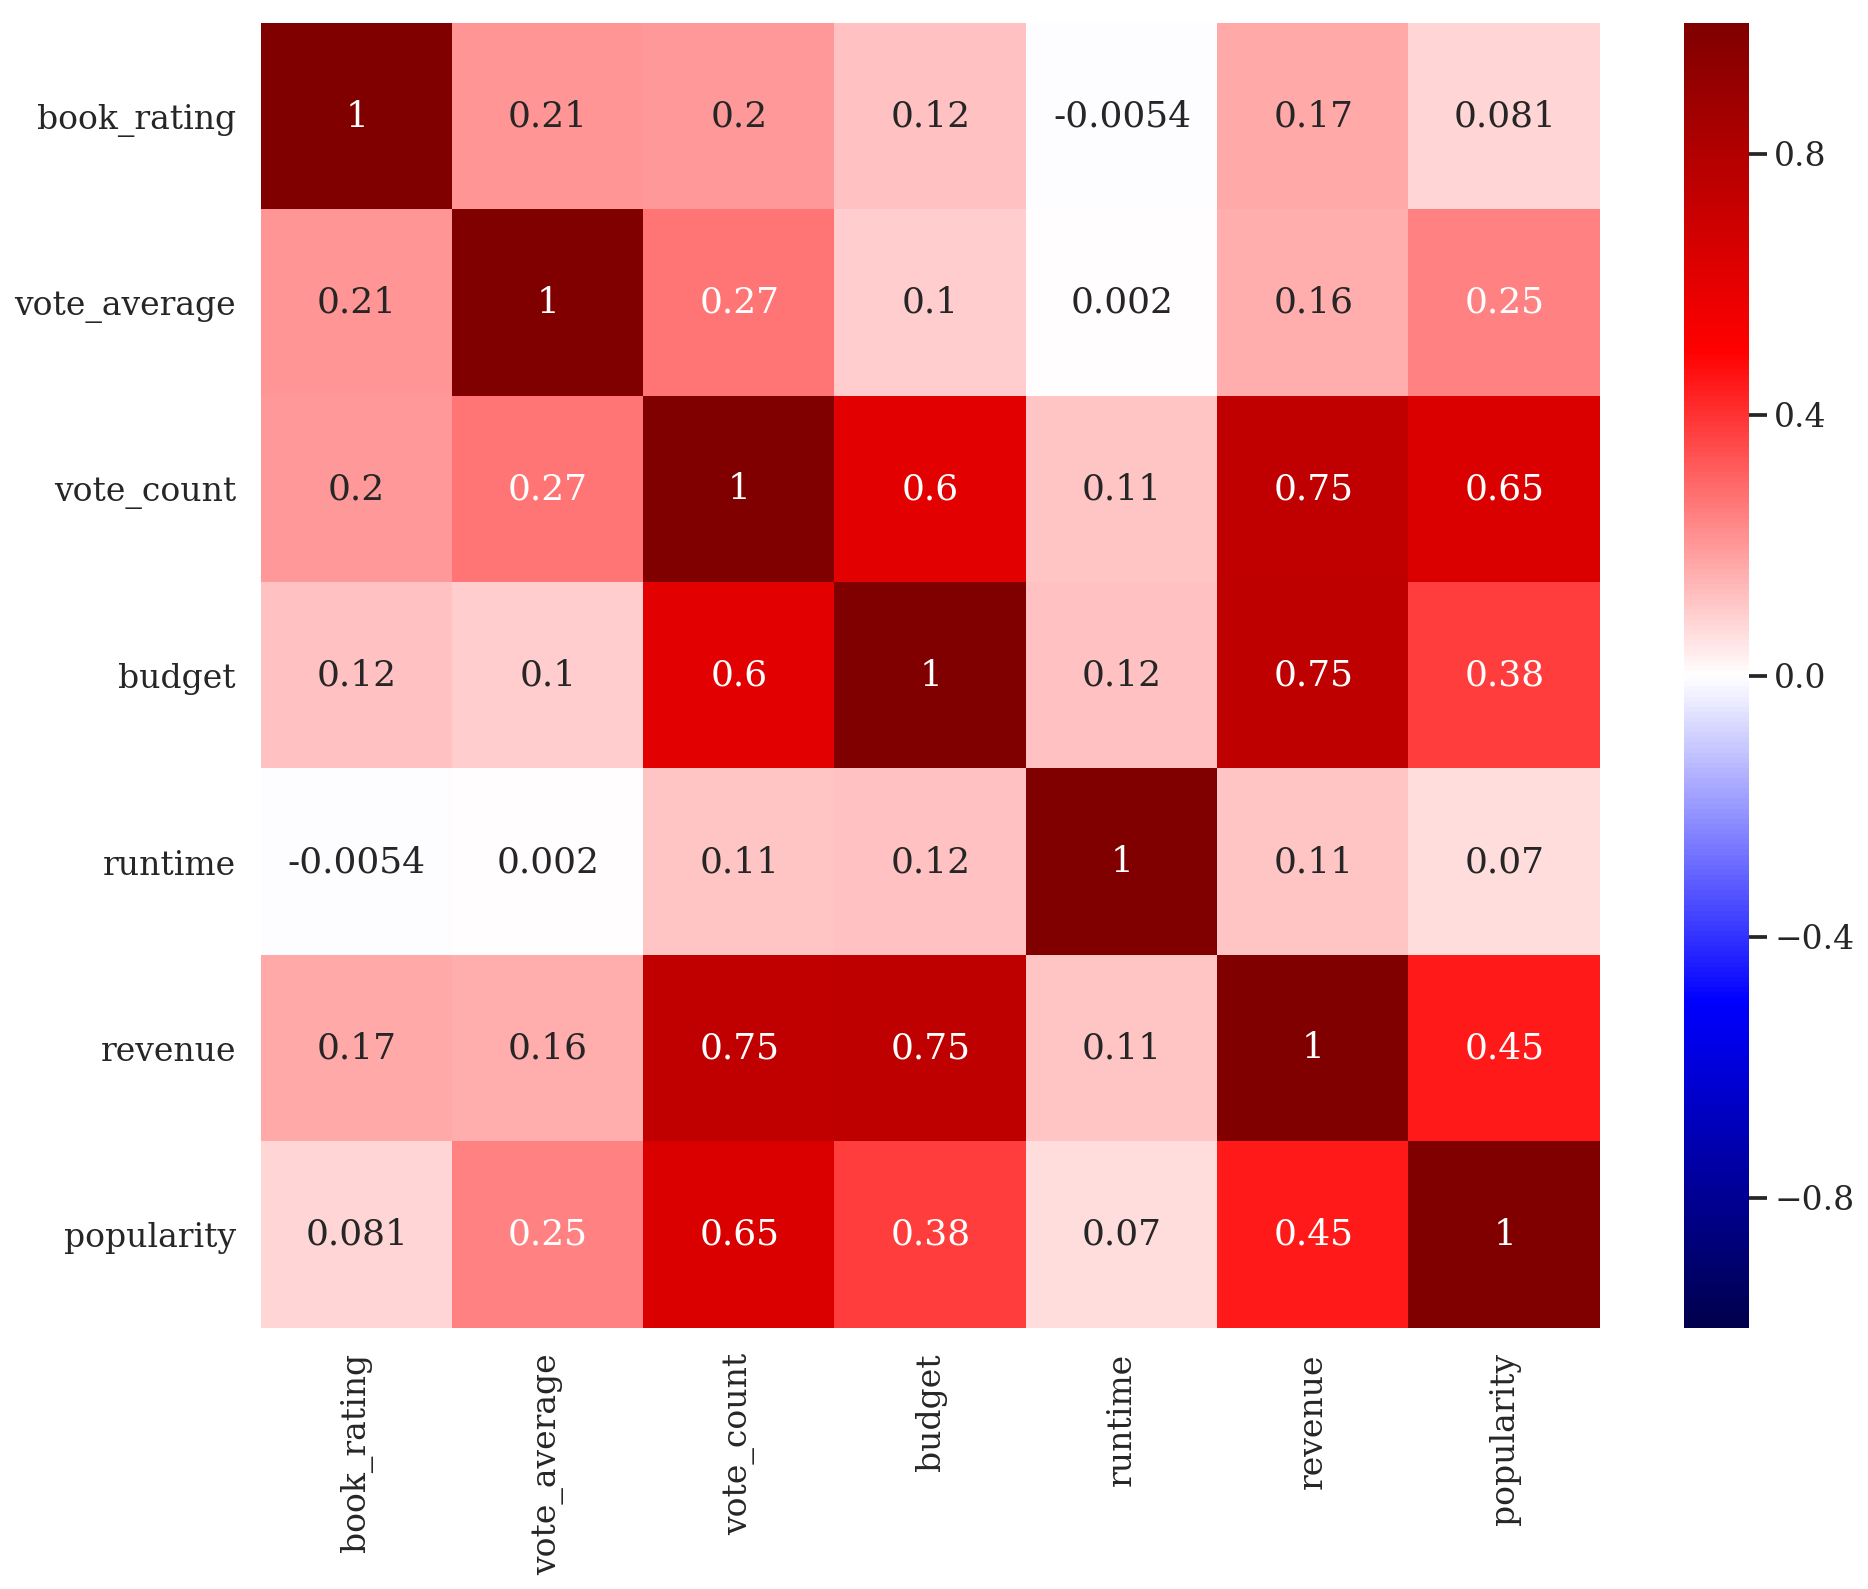

In [84]:
plt.figure(figsize = (15,12))

sns.heatmap(bk_mv.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

In [85]:
# Create your feature matrix (X) and target vector (y)
y, X = patsy.dmatrices('vote_average ~ book_rating + popularity', data=bk_mv, return_type="dataframe")

# Create your model
model = sm.OLS(y, X)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           vote_average   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     37.46
Date:                Wed, 10 Apr 2019   Prob (F-statistic):           3.50e-16
Time:                        17:05:41   Log-Likelihood:                -1105.7
No. Observations:                 705   AIC:                             2217.
Df Residuals:                     702   BIC:                             2231.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.0411      0.774      2.636      0.009       0.521       3.562
book_rating     1.0324      0.198      5.223      0.000       0.644       1.420
popularity      0.0297      0.005      6.459      0.000       0.021       0.039
==============================================================================
Omnibus:                      422.879   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4377.019
Skew:                          -2.549   Prob(JB):                         0.00
Kurtosis:                      14.091   Cond. No.                         232.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""